In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

In [2]:
# data=pd.read_csv('/Users/rsklanu/Capstone_blackfriday/BlackFriday.csv')
data=pd.read_csv('D:/GL/Capstone/DSE PT/BlackFriday.csv')

In [3]:
print(data.shape)

(537577, 12)


In [4]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
User_ID                       537577 non-null int64
Product_ID                    537577 non-null object
Gender                        537577 non-null object
Age                           537577 non-null object
Occupation                    537577 non-null int64
City_Category                 537577 non-null object
Stay_In_Current_City_Years    537577 non-null object
Marital_Status                537577 non-null int64
Product_Category_1            537577 non-null int64
Product_Category_2            370591 non-null float64
Product_Category_3            164278 non-null float64
Purchase                      537577 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB
None


### Inference

There are 537577 observations and 12 features

We observe there are missing values for Product_Category_2 and Product_Category_3
166986 of 537577 Product_Category_2 observations are missing or Null

373299 of 537577 Product_Category_3 observations are missing or Null

In [5]:
data["Product_Category_2"].fillna(0, inplace = True) 
data["Product_Category_3"].fillna(0, inplace = True) 

In [6]:
data['Product_Category_2']  =  data['Product_Category_2'].astype('int32')
data['Product_Category_3']  =  data['Product_Category_3'].astype('int32')

In [7]:
data['Product_Category_1']= data['Product_Category_1'].astype('category')

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
User_ID                       537577 non-null int64
Product_ID                    537577 non-null object
Gender                        537577 non-null object
Age                           537577 non-null object
Occupation                    537577 non-null int64
City_Category                 537577 non-null object
Stay_In_Current_City_Years    537577 non-null object
Marital_Status                537577 non-null int64
Product_Category_1            537577 non-null category
Product_Category_2            537577 non-null int32
Product_Category_3            537577 non-null int32
Purchase                      537577 non-null int64
dtypes: category(1), int32(2), int64(4), object(5)
memory usage: 41.5+ MB


In [9]:
data.head().T

,0,1,2,3,4
User_ID,1000001,1000001,1000001,1000001,1000002
Product_ID,P00069042,P00248942,P00087842,P00085442,P00285442
Gender,F,F,F,F,M
Age,0-17,0-17,0-17,0-17,55+
Occupation,10,10,10,10,16
City_Category,A,A,A,A,C
Stay_In_Current_City_Years,2,2,2,2,4+
Marital_Status,0,0,0,0,0
Product_Category_1,3,1,12,12,8
Product_Category_2,0,6,0,14,0


### Concatenate product categories

In [10]:
data['prod_cat_comb'] = data['Product_Category_1'].astype(str) + '-'+ data['Product_Category_2'].astype(str) + '-'+ \
                        data['Product_Category_3'].astype(str) 

In [11]:
data.head().T

,0,1,2,3,4
User_ID,1000001,1000001,1000001,1000001,1000002
Product_ID,P00069042,P00248942,P00087842,P00085442,P00285442
Gender,F,F,F,F,M
Age,0-17,0-17,0-17,0-17,55+
Occupation,10,10,10,10,16
City_Category,A,A,A,A,C
Stay_In_Current_City_Years,2,2,2,2,4+
Marital_Status,0,0,0,0,0
Product_Category_1,3,1,12,12,8
Product_Category_2,0,6,0,14,0


Drop unwanted columns, Product_Category_1, 2 and 3

In [12]:
data.drop(['Product_Category_1', 'Product_Category_2','Product_Category_3'], axis=1, inplace=True)

In [13]:
print(data.isnull().sum() * 100 / len(data))

User_ID                       0.0
Product_ID                    0.0
Gender                        0.0
Age                           0.0
Occupation                    0.0
City_Category                 0.0
Stay_In_Current_City_Years    0.0
Marital_Status                0.0
Purchase                      0.0
prod_cat_comb                 0.0
dtype: float64


In [14]:
data['Gender']               =    data['Gender'].astype('category')
data['Age']                  =    data['Age'].astype('category')
data['Occupation']           =    data['Occupation'].astype('category')
data['City_Category']        =    data['City_Category'].astype('category')
data['Marital_Status']       =    data['Marital_Status'].astype('category')

In [15]:
print(data['prod_cat_comb'].unique())

['3-0-0' '1-6-14' '12-0-0' '12-14-0' '8-0-0' '1-2-0' '1-8-17' '1-15-0'
 '1-16-0' '5-11-0' '1-2-5' '5-8-14' '4-5-0' '2-3-4' '5-14-0' '1-14-16'
 '1-5-15' '1-8-14' '6-8-0' '2-4-8' '5-0-0' '3-4-0' '2-4-9' '5-12-0'
 '1-11-15' '14-0-0' '1-15-16' '5-9-0' '6-10-13' '1-6-8' '8-17-0' '8-13-0'
 '1-6-0' '5-8-0' '8-14-0' '1-5-6' '8-11-0' '1-8-0' '8-16-0' '1-2-6'
 '1-2-15' '1-6-15' '5-15-0' '1-15-17' '3-4-9' '4-8-9' '1-2-13' '2-3-15'
 '2-9-14' '3-4-5' '5-6-0' '5-6-13' '1-0-0' '3-5-0' '11-0-0' '3-4-12'
 '1-2-4' '3-12-0' '1-11-16' '2-4-15' '1-2-3' '6-16-0' '11-16-0' '1-6-16'
 '2-8-14' '13-16-0' '1-5-12' '1-5-9' '2-4-0' '5-8-18' '1-8-9' '2-0-0'
 '2-17-0' '8-14-17' '1-5-0' '15-0-0' '8-15-0' '8-10-0' '5-9-14' '7-0-0'
 '8-13-15' '16-0-0' '1-8-16' '4-5-9' '1-2-14' '5-17-0' '12-14-17' '5-8-17'
 '5-6-11' '1-14-0' '1-2-16' '11-13-16' '15-16-0' '18-0-0' '1-14-17'
 '8-9-14' '1-13-16' '1-5-14' '3-15-0' '6-8-15' '11-15-0' '6-8-10' '6-8-13'
 '6-8-16' '2-5-14' '1-2-8' '10-16-0' '8-15-16' '12-17-0' '4-5-12'
 '10-13-

In [16]:
data['prod_cat_comb'] =  data['prod_cat_comb'].astype('category')

In [17]:
def draw_barplot(df, X, xlab, title, Y):
    
    import   seaborn           as sns
    import   matplotlib.pyplot as plt
    import   pandas            as pd
    
    x       =   df[X]
    y       =   df[Y]
    ct      =   pd.crosstab(df[X], df[Y])
    
    print("\n Cross tab with count\n")
    print(ct)

    ### Cross tab with row percentages
    print("\n Cross tab with row % \n")
    ct1 = pd.crosstab(df[X], df[Y], normalize = 'index').round(4)*100
    print(ct1)

    # now stack and reset
    stacked = ct.stack().reset_index().rename(columns={0:'value'})

    # plot grouped bar chart
    ax = sns.barplot(x = stacked[X], y = stacked.value)
    ax.set_title(title)   
    plt.xticks(rotation=90)
    plt.show()

In [18]:
df_p             = pd.DataFrame()
purchase_cat     = pd.qcut(data['Purchase'], 5).astype('category')
gender           = data['Gender']
age_cat          = data['Age']

dict1            = {'age': age_cat, 'gender' : gender, 'purchase': purchase_cat}
df_p             = pd.DataFrame(dict1, dtype = 'object')

print(df_p['age'].head())
print(df_p['purchase'].head())
print(df_p.head())

0    0-17
1    0-17
2    0-17
3    0-17
4     55+
Name: age, dtype: object
0      (7166.0, 9577.0]
1    (15179.0, 23961.0]
2     (184.999, 5293.0]
3     (184.999, 5293.0]
4      (7166.0, 9577.0]
Name: purchase, dtype: object
    age gender            purchase
0  0-17      F    (7166.0, 9577.0]
1  0-17      F  (15179.0, 23961.0]
2  0-17      F   (184.999, 5293.0]
3  0-17      F   (184.999, 5293.0]
4   55+      M    (7166.0, 9577.0]



 Cross tab with count

purchase  (184.999, 5293.0]  (5293.0, 7166.0]  (7166.0, 9577.0]  \
age                                                               
0-17                   3431              2817              2831   
18-25                 21124             19144             19008   
26-35                 43807             43469             42259   
36-45                 20646             21721             21410   
46-50                  8577              9069              9340   
51-55                  6415              7436              7826   
55+                    3577              3942              4698   

purchase  (9577.0, 15179.0]  (15179.0, 23961.0]  
age                                              
0-17                   2940                2688  
18-25                 19136               19222  
26-35                 42122               43033  
36-45                 21864               21858  
46-50                  8955                8585  
51-55                 

D:\Python\lib\site-packages\seaborn\categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)
D:\Python\lib\site-packages\scipy\stats\stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


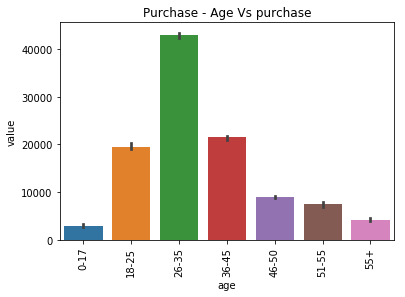

In [19]:
draw_barplot(df_p, 'age', 'Age', 'Purchase - Age Vs purchase', 'purchase')

    age occupation        purchase_cat
0  0-17         10    (7166.0, 9577.0]
1  0-17         10  (15179.0, 23961.0]
2  0-17         10   (184.999, 5293.0]
3  0-17         10   (184.999, 5293.0]
4   55+         16    (7166.0, 9577.0]

 Cross tab with count

purchase_cat  (184.999, 5293.0]  (5293.0, 7166.0]  (7166.0, 9577.0]  \
occupation                                                            
0                         14372             13625             13595   
1                          9213              9828              9879   
2                          5553              5388              5333   
3                          3441              3750              3460   
4                         15005             13712             14176   
5                          2471              2400              2191   
6                          3720              4005              4199   
7                         11247             11404             11234   
8                           288 

D:\Python\lib\site-packages\seaborn\categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)
D:\Python\lib\site-packages\scipy\stats\stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


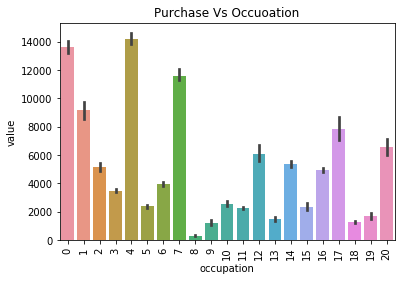

In [20]:
df_p             = pd.DataFrame()
purchase_cat     = pd.qcut(data['Purchase'], 5)
occupation       = data['Occupation']
age_cat          = data['Age']

dict1            = {'age': age_cat, 'occupation' : occupation, 'purchase_cat' : purchase_cat }
df_p             = pd.DataFrame(dict1, dtype = 'object')
print(df_p.head())

draw_barplot(df_p, 'occupation', 'Occupation', 'Purchase Vs Occuoation', 'purchase_cat')

In [21]:
df_p             = pd.DataFrame()
purchase_cat     = pd.qcut(data['Purchase'], 5).astype('category')
Gender           = data['Gender']
prod_cat          = data['prod_cat_comb']

dict1            = {'prod_cat': prod_cat, 'Gender' : Gender, 'purchase': purchase_cat}
df_p             = pd.DataFrame(dict1, dtype = 'object')

print(df_p['prod_cat'].head())
print(df_p['purchase'].head())
print(df_p.head())



0      3-0-0
1     1-6-14
2     12-0-0
3    12-14-0
4      8-0-0
Name: prod_cat, dtype: object
0      (7166.0, 9577.0]
1    (15179.0, 23961.0]
2     (184.999, 5293.0]
3     (184.999, 5293.0]
4      (7166.0, 9577.0]
Name: purchase, dtype: object
  prod_cat Gender            purchase
0    3-0-0      F    (7166.0, 9577.0]
1   1-6-14      F  (15179.0, 23961.0]
2   12-0-0      F   (184.999, 5293.0]
3  12-14-0      F   (184.999, 5293.0]
4    8-0-0      M    (7166.0, 9577.0]



 Cross tab with count

purchase  (184.999, 5293.0]  (5293.0, 7166.0]  (7166.0, 9577.0]  \
prod_cat                                                          
1-0-0                   416                 0               887   
1-11-0                   98                 0               149   
1-11-15                 215                 0               406   
1-11-16                  39                 0                86   
1-13-14                  21                 0                59   
1-13-15                  63                 0                75   
1-13-16                  11                 0                46   
1-14-0                   48                 0               146   
1-14-15                  16                 0                51   
1-14-16                 176                 0               361   
1-14-17                  11                 0                40   
1-15-0                  795                 0              1162   
1-15-16                 455           

D:\Python\lib\site-packages\seaborn\categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)
D:\Python\lib\site-packages\scipy\stats\stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


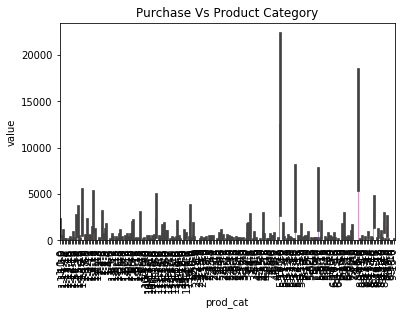

In [22]:
draw_barplot(df_p, 'prod_cat', 'product_category', 'Purchase Vs Product Category', 'purchase')

0    F
1    F
2    F
3    F
4    M
Name: Gender, dtype: object
0      (7166.0, 9577.0]
1    (15179.0, 23961.0]
2     (184.999, 5293.0]
3     (184.999, 5293.0]
4      (7166.0, 9577.0]
Name: purchase, dtype: object
  Gender            purchase
0      F    (7166.0, 9577.0]
1      F  (15179.0, 23961.0]
2      F   (184.999, 5293.0]
3      F   (184.999, 5293.0]
4      M    (7166.0, 9577.0]

 Cross tab with count

purchase  (184.999, 5293.0]  (5293.0, 7166.0]  (7166.0, 9577.0]  \
Gender                                                            
F                     27607             29579             28767   
M                     79970             78019             78605   

purchase  (9577.0, 15179.0]  (15179.0, 23961.0]  
Gender                                           
F                     25493               20751  
M                     82062               86724  

 Cross tab with row % 

purchase  (184.999, 5293.0]  (5293.0, 7166.0]  (7166.0, 9577.0]  \
Gender                      

D:\Python\lib\site-packages\seaborn\categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)
D:\Python\lib\site-packages\scipy\stats\stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


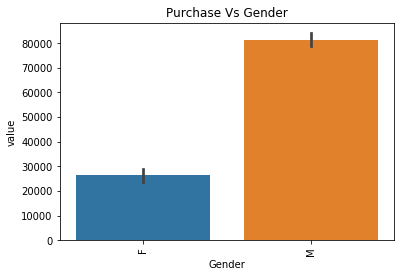

In [23]:
df_p             = pd.DataFrame()
purchase_cat     = pd.qcut(data['Purchase'], 5).astype('category')
Gender           = data['Gender']


dict1            = {'Gender' : Gender, 'purchase': purchase_cat}
df_p             = pd.DataFrame(dict1, dtype = 'object')

print(df_p['Gender'].head())
print(df_p['purchase'].head())
print(df_p.head())

draw_barplot(df_p, 'Gender', 'Gender', 'Purchase Vs Gender', 'purchase')

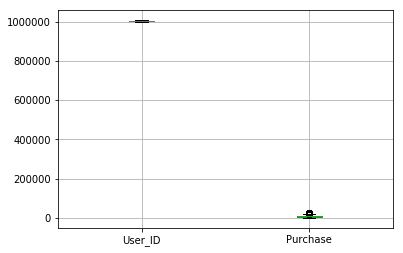

In [24]:
data.boxplot()

0    A
1    A
2    A
3    A
4    C
Name: City_Category, dtype: object
0      (7166.0, 9577.0]
1    (15179.0, 23961.0]
2     (184.999, 5293.0]
3     (184.999, 5293.0]
4      (7166.0, 9577.0]
Name: purchase, dtype: object
  City_Category            purchase
0             A    (7166.0, 9577.0]
1             A  (15179.0, 23961.0]
2             A   (184.999, 5293.0]
3             A   (184.999, 5293.0]
4             C    (7166.0, 9577.0]

 Cross tab with count

purchase       (184.999, 5293.0]  (5293.0, 7166.0]  (7166.0, 9577.0]  \
City_Category                                                          
A                          31865             30381             29127   
B                          46923             46445             44790   
C                          28789             30772             33455   

purchase       (9577.0, 15179.0]  (15179.0, 23961.0]  
City_Category                                         
A                          28028               25237  
B             

D:\Python\lib\site-packages\seaborn\categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)
D:\Python\lib\site-packages\scipy\stats\stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


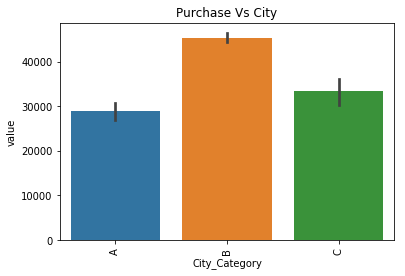

In [25]:
df_p             = pd.DataFrame()
purchase_cat     = pd.qcut(data['Purchase'], 5).astype('category')
City_Category           = data['City_Category']


dict1            = {'City_Category' : City_Category, 'purchase': purchase_cat}
df_p             = pd.DataFrame(dict1, dtype = 'object')

print(df_p['City_Category'].head())
print(df_p['purchase'].head())
print(df_p.head())

draw_barplot(df_p, 'City_Category', 'City_Category', 'Purchase Vs City', 'purchase')

0     2
1     2
2     2
3     2
4    4+
Name: Stay_In_Current_City_Years, dtype: object
0      (7166.0, 9577.0]
1    (15179.0, 23961.0]
2     (184.999, 5293.0]
3     (184.999, 5293.0]
4      (7166.0, 9577.0]
Name: purchase, dtype: object
  Stay_In_Current_City_Years            purchase
0                          2    (7166.0, 9577.0]
1                          2  (15179.0, 23961.0]
2                          2   (184.999, 5293.0]
3                          2   (184.999, 5293.0]
4                         4+    (7166.0, 9577.0]

 Cross tab with count

purchase                    (184.999, 5293.0]  (5293.0, 7166.0]  \
Stay_In_Current_City_Years                                        
0                                       14739             14738   
1                                       38163             37810   
2                                       19677             19797   
3                                       18572             18783   
4+                                      16

D:\Python\lib\site-packages\seaborn\categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)
D:\Python\lib\site-packages\scipy\stats\stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


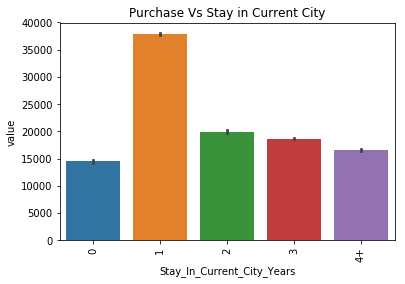

In [26]:
df_p             = pd.DataFrame()
purchase_cat     = pd.qcut(data['Purchase'], 5).astype('category')
Stay_In_Current_City_Years     = data['Stay_In_Current_City_Years']


dict1            = {'Stay_In_Current_City_Years' : Stay_In_Current_City_Years, 'purchase': purchase_cat}
df_p             = pd.DataFrame(dict1, dtype = 'object')

print(df_p['Stay_In_Current_City_Years'].head())
print(df_p['purchase'].head())
print(df_p.head())

draw_barplot(df_p, 'Stay_In_Current_City_Years', 'Stay_In_Current_City_Years', 'Purchase Vs Stay in Current City', 'purchase')

import numpy as np
from kmodes.kmodes import KModes

km = KModes(n_clusters=4, init='Huang', n_init=5, verbose=1)

clusters = km.fit_predict(data)

print(km.cluster_centroids_)

In [27]:
import numpy as np
from kmodes.kmodes import KModes

km = KModes(n_clusters=5, init='Huang', n_init=3, verbose=1)

clusters = km.fit_predict(data)

print(km.cluster_centroids_)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 173780, cost: 3495073.0
Run 1, iteration: 2/100, moves: 13683, cost: 3495073.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 173942, cost: 3439102.0
Run 2, iteration: 2/100, moves: 1075, cost: 3439102.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 165342, cost: 3434633.0
Run 3, iteration: 2/100, moves: 1140, cost: 3434633.0
Best run was number 3
[['1003539' 'P00248142' 'F' '18-25' '4' 'B' '1' '1' '7108' '5-0-0']
 ['1004277' 'P00031042' 'M' '26-35' '4' 'A' '0' '0' '7916' '8-0-0']
 ['1001941' 'P00265242' 'M' '26-35' '0' 'C' '1' '0' '7114' '5-0-0']
 ['1001680' 'P00031042' 'M' '26-35' '12' 'B' '1' '1' '7766' '8-0-0']
 ['1003808' 'P00274042' 'M' '26-35' '6' 'B' '2' '1' '7025' '1-0-0']]


In [28]:
df_dummy = data #pd.get_dummies(data)

#transform into numpy array
x        = df_dummy.reset_index().values
km       = KModes(n_clusters=3, init='Huang', n_init=5, verbose=0)
print(x[:5])

[[0 1000001 'P00069042' 'F' '0-17' 10 'A' '2' 0 8370 '3-0-0']
 [1 1000001 'P00248942' 'F' '0-17' 10 'A' '2' 0 15200 '1-6-14']
 [2 1000001 'P00087842' 'F' '0-17' 10 'A' '2' 0 1422 '12-0-0']
 [3 1000001 'P00085442' 'F' '0-17' 10 'A' '2' 0 1057 '12-14-0']
 [4 1000002 'P00285442' 'M' '55+' 16 'C' '4+' 0 7969 '8-0-0']]


In [29]:
clusters = km.fit_predict(x)
df_dummy['clusters'] = clusters

In [30]:
df_dummy.drop(columns = ['User_ID'],axis = 1, inplace = True)

In [31]:
print(df_dummy.T)

                               0          1          2          3       \
Product_ID                  P00069042  P00248942  P00087842  P00085442   
Gender                              F          F          F          F   
Age                              0-17       0-17       0-17       0-17   
Occupation                         10         10         10         10   
City_Category                       A          A          A          A   
Stay_In_Current_City_Years          2          2          2          2   
Marital_Status                      0          0          0          0   
Purchase                         8370      15200       1422       1057   
prod_cat_comb                   3-0-0     1-6-14     12-0-0    12-14-0   
clusters                            1          1          1          1   

                               4          5          6          7       \
Product_ID                  P00285442  P00193542  P00184942  P00346142   
Gender                              M

In [32]:
print(df_dummy.loc[df_dummy['clusters'] == 2,:])

       Product_ID Gender    Age Occupation City_Category  \
4       P00285442      M    55+         16             C   
18      P00036842      M  36-45          1             B   
19      P00249542      M  26-35         12             C   
20      P00220442      M  26-35         12             C   
21      P00156442      M  26-35         12             C   
22      P00213742      M  26-35         12             C   
23      P00214442      M  26-35         12             C   
24      P00303442      M  26-35         12             C   
29      P00085942      F  36-45          1             B   
30      P00118742      F  36-45          1             B   
31      P00297942      F  36-45          1             B   
32      P00266842      F  36-45          1             B   
33      P00058342      F  36-45          1             B   
34      P00032442      F  36-45          1             B   
35      P00105942      F  36-45          1             B   
36      P00182642      F  36-45         

In [33]:
print(df_dummy.loc[df_dummy['clusters'] == 1,:])

       Product_ID Gender    Age Occupation City_Category  \
0       P00069042      F   0-17         10             A   
1       P00248942      F   0-17         10             A   
2       P00087842      F   0-17         10             A   
3       P00085442      F   0-17         10             A   
5       P00193542      M  26-35         15             A   
6       P00184942      M  46-50          7             B   
7       P00346142      M  46-50          7             B   
8        P0097242      M  46-50          7             B   
50      P00304242      M  26-35         12             C   
51      P00365242      M  26-35         12             C   
56      P00334242      M  26-35          7             A   
57      P00247542      M  26-35          7             A   
58      P00338442      M  26-35          7             A   
59      P00275142      M  26-35          7             A   
60      P00333042      M  26-35          7             A   
61      P00166242      M  26-35         

In [34]:
print(df_dummy.loc[df_dummy['clusters'] == 0,:])

       Product_ID Gender    Age Occupation City_Category  \
9       P00274942      M  26-35         20             A   
10      P00251242      M  26-35         20             A   
11      P00014542      M  26-35         20             A   
12      P00031342      M  26-35         20             A   
13      P00145042      M  26-35         20             A   
14      P00231342      F  51-55          9             A   
15      P00190242      F  51-55          9             A   
16       P0096642      F  51-55          9             A   
17      P00058442      F  51-55          9             A   
25      P00135742      M  26-35         17             C   
26      P00039942      M  26-35         17             C   
27      P00161442      M  26-35         17             C   
28      P00078742      M  26-35         17             C   
47      P00192642      F  26-35          1             C   
48      P00110842      F  26-35          1             C   
49      P00189642      F  26-35         

In [35]:
df_dummy.to_csv('Cluseter_data.csv', index = False)

In [36]:
import os; os.getcwd()

'D:\\RRD\\Courseware\\ipynb files'